In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize 

In [2]:
# generate an independent variable 
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head() 

,x,y
0,-10.000000,-19.528680
1,-9.595960,-17.063129
2,-9.191919,-12.124462
3,-8.787879,-15.801404
4,-8.383838,-12.177258


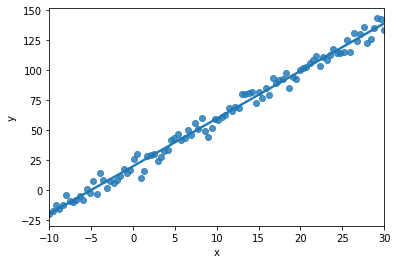

In [3]:
sns.regplot(x='x', y='y', data = df)
plt.show() 

In [4]:
# Ordinary least square
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9470.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.61e-99
Time:                        13:07:58   Log-Likelihood:                -296.81
No. Observations:                 100   AIC:                             597.6
Df Residuals:                      98   BIC:                             602.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0472      0.626     32.003      0.000      18.804      21.290
x              3.9679      0.041     97.314      0.000       3.887       4.049
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.255
Skew:                          -0.238   Prob(JB):                        0.534
Kurtosis:                       2.728   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
res = model.resid
standard_dev = np.std(res)
standard_dev 

4.707656207739429

In [9]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
# extract parameters
    const, beta, std_dev = parameters
   # predict the output
    pred = const + beta*x
   # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
   # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [10]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model 

      fun: 296.8128696942253
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([2.27373675e-05, 2.27373675e-05, 2.84217094e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 232
      nit: 35
   status: 0
  success: True
        x: array([20.04724267,  3.96786335,  4.70765871])